# Dataset Exploration

In [2]:
import math
import numpy as np
from sklearn import linear_model
import scipy.stats as stats
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = "../State_of_Iowa_Salary_Book.csv"

In [4]:
def money_to_float(x):
    try:
        if type(x) == float:
            return x
        return float(x.strip('$'))
    except ValueError:
        return float('nan')

def base_salary_to_float(x):
    try:
        if type(x) == float and math.isnan(x):
            return (None, float('nan'))
        elif type(x) == float:
            return (None, x)
        x = x.strip(" ")
        if x == "":
            return (None, float('nan'))
        elif x == "TERMINATED":
            return ("TERMINATED", float('nan'))
        elif x == "Terminated":
            return ("Terminated", float('nan'))
        elif x == "-0-":
            return ("-0-", float('nan'))
        elif x == "ON LEAVE":
            return ("ON LEAVE", float('nan'))
        elif x == "nan":
            return (None, float('nan'))
        elif x == float("nan"):
            return (None, float('nan'))
        else:
            s = x.replace('/', " ").split(' ')
            if len(s) < 2:
                return (None, float(s[0].strip('$').replace(',', "")))
            return (s[1], float(s[0].strip('$').replace(',', "")))
    except:
        # this is to show rows that failed the parsing
        print("<-"+x+"->", type(x))

In [5]:
# read csv
data = pd.read_csv(path, parse_dates=[0,8], converters={'Total Salary Paid': money_to_float, 'Base Salary': base_salary_to_float, 'Travel & Subsistence': money_to_float})
# split Base Salary tuple into two columns
base_salary_parsed = data["Base Salary"].apply(pd.Series).rename(columns={0:'Base Salary Payment Method', 1:'Base Salary Payment Amount'})
data.insert(8, 'Base Salary Payment Method', base_salary_parsed['Base Salary Payment Method'])
data.insert(9, 'Base Salary Payment Amount', base_salary_parsed['Base Salary Payment Amount'])
# delete Base Salary tuple column
data.pop("Base Salary")

('<-HR->', <type 'str'>)
('<-YR->', <type 'str'>)
('<-20.12HR->', <type 'str'>)
('<-262.99DA->', <type 'str'>)


0               (HR, 31.62)
1         (TERMINATED, nan)
2              (BW, 2212.8)
3              (BW, 1226.4)
4         (TERMINATED, nan)
5         (TERMINATED, nan)
6         (TERMINATED, nan)
7         (TERMINATED, nan)
8              (BW, 2194.4)
9         (TERMINATED, nan)
10        (TERMINATED, nan)
11        (TERMINATED, nan)
12             (BW, 3375.2)
13        (TERMINATED, nan)
14        (TERMINATED, nan)
15             (BW, 3349.6)
16           (YR, 144200.0)
17             (BW, 1237.6)
18             (BW, 2908.8)
19             (BW, 3193.6)
20        (TERMINATED, nan)
21             (BW, 1598.4)
22        (TERMINATED, nan)
23        (TERMINATED, nan)
24        (TERMINATED, nan)
25        (TERMINATED, nan)
26             (BW, 1180.8)
27             (BW, 3087.2)
28             (BW, 1437.6)
29             (BW, 4792.0)
                ...        
665295          (HR, 23.91)
665296        (HR, 25629.0)
665297          (HR, 22.88)
665298    (TERMINATED, nan)
665299          (HR,

In [6]:
# shows the unique payment types
print(data["Base Salary Payment Method"].unique())

# function to estimate hourly wages and hours worked, 
def hourly_estimates(x):
    # dictionary containing conversions of method to number of hours
    method_to_hour_estimate = {'HR': 1, 'BW': 80, 'YR': 2000, 'DA': 8, 'DAILY': 8, 
                               'AN': 2000, 'HRLY': 1, 'BM': 333.33, 'PW': 40}
    # get data from row
    method, amount_per_method, total = x["Base Salary Payment Method"], x["Base Salary Payment Amount"], x["Total Salary Paid"]
    # calc hourly wage and hours worked
    try:
        hourly_wage_estimate = amount_per_method / method_to_hour_estimate.get(method, np.nan) # if the dict does not have a conversion the default is NaN
        hours_worked_estimate = total/hourly_wage_estimate
    except ZeroDivisionError:
        hourly_wage_estimate = np.nan
        hours_worked_estimate = np.nan
    # return tuple
    return hourly_wage_estimate, hours_worked_estimate
# hour_parsed is a dataframe containing all of the hourly estimates
hour_parsed = data[["Base Salary Payment Method", "Base Salary Payment Amount", "Total Salary Paid"]] \
                    .apply(hourly_estimates, axis=1).apply(pd.Series).rename(columns={0:'Hourly Wage Estimate', 1:'Hours Worked Estimate'})  # axis one means that you apply the function on the row instead of the column
# if you were to do x.values it would give you the values of the complete row
data.insert(11, 'Hourly Wage Estimate', hour_parsed['Hourly Wage Estimate'])
data.insert(12, 'Hours Worked Estimate', hour_parsed['Hours Worked Estimate'])

['HR' 'TERMINATED' 'BW' 'YR' 'DA' nan '893.00' 'DAILY' 'AN' 'ON LEAVE'
 '-0-' 'HRLY' 'BM' 'PW' '' 'Terminated']


In [7]:
data.dtypes

Fiscal Year                   datetime64[ns]
Department                            object
Agency/Institution                    object
Name                                  object
Gender                                object
Place of Residence                    object
Position                              object
Base Salary Payment Method            object
Base Salary Payment Amount           float64
Base Salary Date              datetime64[ns]
Total Salary Paid                    float64
Hourly Wage Estimate                 float64
Hours Worked Estimate                float64
Travel & Subsistence                 float64
dtype: object

In [8]:
data

,Fiscal Year,Department,Agency/Institution,Name,Gender,Place of Residence,Position,Base Salary Payment Method,Base Salary Payment Amount,Base Salary Date,Total Salary Paid,Hourly Wage Estimate,Hours Worked Estimate,Travel & Subsistence
0,2007-01-01,"Administrative Services, Department of",NaN,ABELS BEVERLY J,F,POLK,ADVANCED PERSONNEL MGMT,HR,31.62,2007-07-01,6462.34,31.6200,204.375079,NaN
1,2007-01-01,"Administrative Services, Department of",NaN,ABRAMS JERRY A,M,WAPELLO,EARLY OUT POSITION,TERMINATED,NaN,2007-07-01,4242.82,NaN,NaN,NaN
2,2007-01-01,"Administrative Services, Department of",NaN,ADAMS CAROL L,F,MITCHELL,ADVANCED PERSONNEL MGMT,BW,2212.80,2007-07-01,55065.60,27.6600,1990.802603,924.44
3,2007-01-01,"Administrative Services, Department of",NaN,ADAMS JEANNIE R,F,POLK,ACCOUNTING TECHNICIAN 2,BW,1226.40,2007-07-01,30800.83,15.3300,2009.186562,6.80
4,2007-01-01,"Administrative Services, Department of",NaN,ADAMS NED J,M,POLK,EARLY OUT POSITION,TERMINATED,NaN,2007-07-01,10634.33,NaN,NaN,NaN
5,2007-01-01,"Administrative Services, Department of",NaN,ADAMSON DAVID A,M,POLK,CONSTRUCTION/DESIGN ENGN,TERMINATED,NaN,2007-07-01,77647.67,NaN,NaN,364.22
6,2007-01-01,"Administrative Services, Department of",NaN,ALLEN DANIEL S,M,POLK,CUSTODIAL WORKER,TERMINATED,NaN,2007-07-01,10520.28,NaN,NaN,7.48
7,2007-01-01,"Administrative Services, Department of",NaN,ALLEN ROSALIE R,F,CHEROKEE,EARLY OUT POSITION,TERMINATED,NaN,2007-07-01,2588.47,NaN,NaN,NaN
8,2007-01-01,"Administrative Services, Department of",NaN,ALLEN SANDRA L,F,POLK,INFO TECH SPECIALIST 2,BW,2194.40,2007-07-01,56205.58,27.4300,2049.055049,65.28
9,2007-01-01,"Administrative Services, Department of",NaN,ALLERHEILIGEN RICHARD D,M,NaN,EARLY OUT POSITION,TERMINATED,NaN,2007-07-01,1522.67,NaN,NaN,NaN


In [9]:
print("Number of unique elements per column")
for k in ["Fiscal Year", "Department", "Agency/Institution", "Gender", "Place of Residence", "Position", "Base Salary Payment Method"]:
    c = data[k].unique()
    print(k, ":", len(c))

Number of unique elements per column
('Fiscal Year', ':', 11)
('Department', ':', 53)
('Agency/Institution', ':', 37)
('Gender', ':', 7)
('Place of Residence', ':', 1426)
('Position', ':', 5699)
('Base Salary Payment Method', ':', 16)


In [10]:
for k in ["Fiscal Year", "Department", "Agency/Institution", "Gender", "Place of Residence", "Position", "Base Salary Payment Method"]:
    c = data[k].value_counts()
    print(str(k)+":\n"+str(c)+"\n\n")

Fiscal Year:
2007-01-01    67695
2009-01-01    60328
2008-01-01    60262
2015-01-01    60138
2011-01-01    60125
2012-01-01    59929
2014-01-01    59859
2013-01-01    59488
2017-01-01    59400
2010-01-01    59113
2016-01-01    58988
Name: Fiscal Year, dtype: int64


Department:
University of Iowa                                     235607
Iowa State University                                  112766
Human Services, Department of                           65299
Transportation, Department of                           38510
Corrections, Department of                              35940
University of Northern Iowa                             30175
Judicial Branch                                         21971
Natural Resources, Department of                        17388
Public Safety, Department of                            10917
Iowa Veterans Home                                       9950
Iowa Workforce Development                               9891
Education, Department of               

In [11]:
# Import data for each area in Iowa
residenceDataFile = "residenceData.csv"
residenceData = pd.read_csv(residenceDataFile, parse_dates=['Fiscal Year'])
print(residenceData)

      Place of Residence Fiscal Year  adult_obesity_value  \
0             CLARE CITY  2016-01-01                  NaN   
1             CLARE CITY  2017-01-01                  NaN   
2             CLARE CITY  2007-01-01                  NaN   
3             CLARE CITY  2008-01-01                  NaN   
4             CLARE CITY  2009-01-01                  NaN   
5             CLARE CITY  2010-01-01                  NaN   
6             CLARE CITY  2011-01-01                  NaN   
7             CLARE CITY  2012-01-01                  NaN   
8             CLARE CITY  2013-01-01                  NaN   
9             CLARE CITY  2014-01-01                  NaN   
10            CLARE CITY  2015-01-01                  NaN   
11            DERBY CITY  2016-01-01                  NaN   
12            DERBY CITY  2017-01-01                  NaN   
13            DERBY CITY  2007-01-01                  NaN   
14            DERBY CITY  2008-01-01                  NaN   
15            DERBY CITY

In [12]:
residenceData[residenceData['adult_obesity_value'].notnull()]

,Place of Residence,Fiscal Year,adult_obesity_value,children_in_poverty_value,income_inequality_value,median_household_income_value,some_college_value,unemployment_value,violent_crime_value,uninsured_value,density,percent_graduate_or_professional_degree,percent_some_college,percent_less_than_9th_grade,percent_associates_degree,percent_bachelors_degree_or_higher,percent_high_school_graduate,count
66,ALLAMAKEE,2016-01-01,0.295,0.212,3.710,44673.0,0.608,0.064,NaN,0.140,21.908,4.8,21.3,6.2,10.8,17.0,43.8,14001
67,ALLAMAKEE,2017-01-01,0.295,0.212,3.710,44673.0,0.608,0.064,NaN,0.140,21.908,4.8,21.3,6.2,10.8,17.0,43.8,14001
68,ALLAMAKEE,2007-01-01,0.295,0.212,3.710,44673.0,0.608,0.064,NaN,0.140,22.565,3.7,21.3,6.8,9.3,13.5,43.8,14421
69,ALLAMAKEE,2008-01-01,0.295,0.212,3.710,44673.0,0.608,0.064,NaN,0.140,22.565,3.7,21.3,6.8,9.3,13.5,43.8,14421
70,ALLAMAKEE,2009-01-01,0.295,0.212,3.710,44673.0,0.608,0.064,NaN,0.140,22.565,3.7,21.3,6.8,9.3,13.5,43.8,14421
71,ALLAMAKEE,2010-01-01,0.295,0.212,3.710,44673.0,0.608,0.064,NaN,0.140,22.424,3.7,21.3,6.8,9.3,13.5,43.8,14331
72,ALLAMAKEE,2011-01-01,0.295,0.212,3.710,44673.0,0.608,0.064,NaN,0.140,22.390,3.8,21.3,6.9,9.5,15.3,43.8,14309
73,ALLAMAKEE,2012-01-01,0.295,0.212,3.710,44673.0,0.608,0.064,NaN,0.140,22.352,3.5,21.3,6.3,9.8,13.8,43.8,14285
74,ALLAMAKEE,2013-01-01,0.295,0.212,3.710,44673.0,0.608,0.064,NaN,0.140,22.285,3.9,21.3,5.7,9.0,14.9,43.8,14242
75,ALLAMAKEE,2014-01-01,0.295,0.212,3.710,44673.0,0.608,0.064,NaN,0.140,22.144,4.5,21.3,5.9,8.7,15.9,43.8,14152


In [13]:
# Merge data and residence data into new dataframe
fullData = pd.merge(data, residenceData, on=["Place of Residence", "Fiscal Year"])
print(fullData.columns.values)
print(fullData)

['Fiscal Year' 'Department' 'Agency/Institution' 'Name' 'Gender'
 'Place of Residence' 'Position' 'Base Salary Payment Method'
 'Base Salary Payment Amount' 'Base Salary Date' 'Total Salary Paid'
 'Hourly Wage Estimate' 'Hours Worked Estimate' 'Travel & Subsistence'
 'adult_obesity_value' 'children_in_poverty_value'
 'income_inequality_value' 'median_household_income_value'
 'some_college_value' 'unemployment_value' 'violent_crime_value'
 'uninsured_value' 'density' 'percent_graduate_or_professional_degree'
 'percent_some_college' 'percent_less_than_9th_grade'
 'percent_associates_degree' 'percent_bachelors_degree_or_higher'
 'percent_high_school_graduate' 'count']
       Fiscal Year                               Department  \
0       2007-01-01  Administrative Services, Department of    
1       2007-01-01  Administrative Services, Department of    
2       2007-01-01  Administrative Services, Department of    
3       2007-01-01  Administrative Services, Department of    
4       200

## End of initial data munging

## Hypothesis Testing

In [14]:
# Filter data so that every row has a value for each given attribute
def filterDataOnAttrs(attrs):
    usefulData = fullData
    for a in attrs:
        usefulData = usefulData[usefulData[a].notnull()]
    return usefulData

# Remove outliers for the given attribute using the Tukey method
def removeOutliersTukey(usefulData, attr):
    thirdQuartile = usefulData.quantile(.75)[attr]
    firstQuartile = usefulData.quantile(.25)[attr]
    IQR = thirdQuartile - firstQuartile
    return usefulData[usefulData[attr].between(firstQuartile - IQR * 1.5, thirdQuartile + IQR * 1.5)]

# Prepare the data for use
def prepData(attrs, predictor, minYear, maxYear):
    # Only consider data that exists for the attributes we want
    usefulData = filterDataOnAttrs(attrs)
    # Restrict to range of years
    usefulData = usefulData[usefulData['Fiscal Year'].dt.year.between(minYear, maxYear)]
    # Remove outliers
    usefulData = removeOutliersTukey(usefulData, predictor)
    return usefulData

## Linear Regression

Predicting Hourly Wage Estimate
89


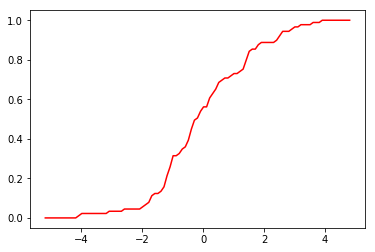

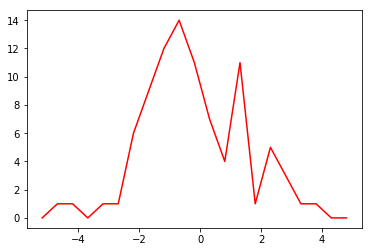

adult_obesity_value
SLR: -0.36, se: 1.58, T: 0.23, MLR: 5.27
Mean Error: 0.00, Error KS-test: KstestResult(statistic=0.9999860214123123, pvalue=0.0)


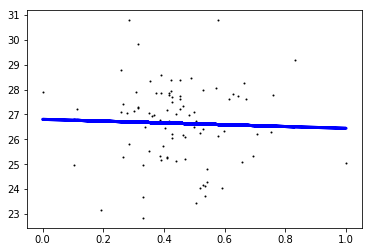

89


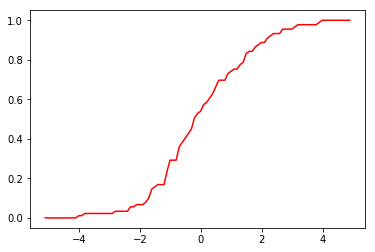

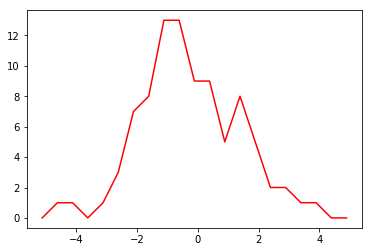

children_in_poverty_value
SLR: -1.07, se: 1.57, T: 0.68, MLR: -5.33
Mean Error: 0.00, Error KS-test: KstestResult(statistic=0.99998029327596782, pvalue=0.0)


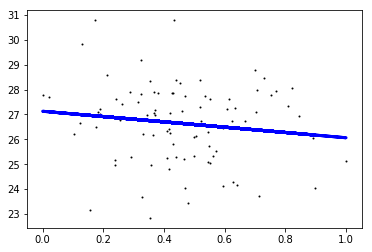

89


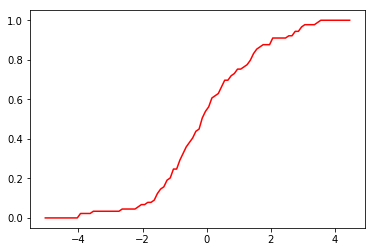

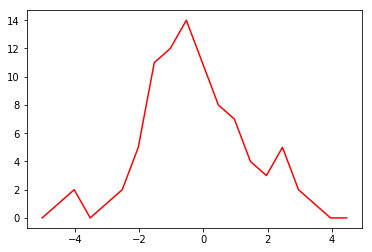

income_inequality_value
SLR: 1.74, se: 1.54, T: 1.13, MLR: 1.23
Mean Error: 0.00, Error KS-test: KstestResult(statistic=0.99997262769392636, pvalue=0.0)


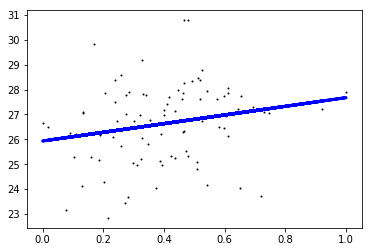

89


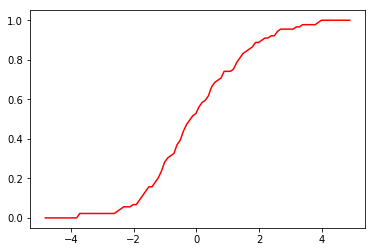

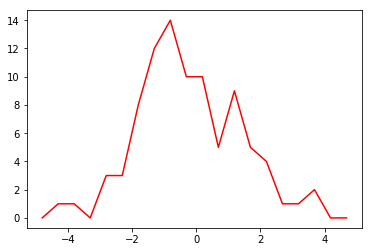

median_household_income_value
SLR: 1.71, se: 1.56, T: 1.10, MLR: 0.00
Mean Error: 0.00, Error KS-test: KstestResult(statistic=0.99995573724289299, pvalue=0.0)


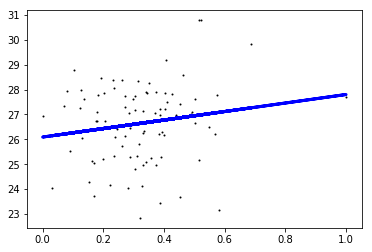

89


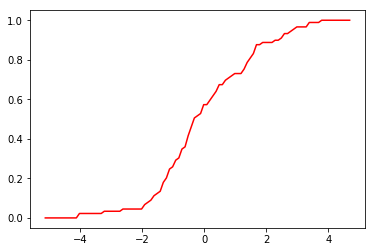

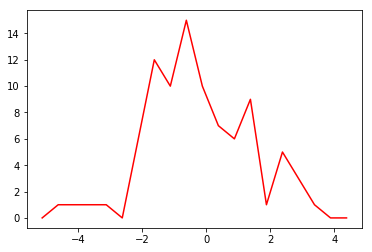

unemployment_value
SLR: 0.62, se: 1.58, T: 0.40, MLR: 23.41
Mean Error: 0.00, Error KS-test: KstestResult(statistic=0.99998073915451824, pvalue=0.0)


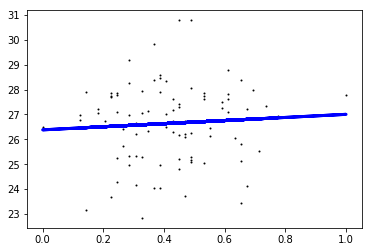

89


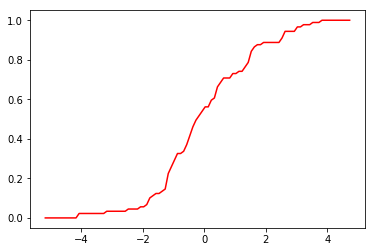

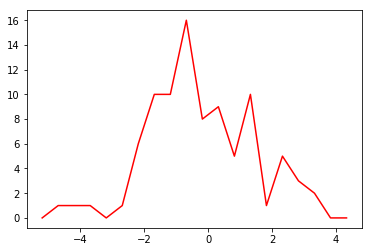

violent_crime_value
SLR: 0.22, se: 1.58, T: 0.14, MLR: -0.00
Mean Error: 0.00, Error KS-test: KstestResult(statistic=0.99998518765891931, pvalue=0.0)


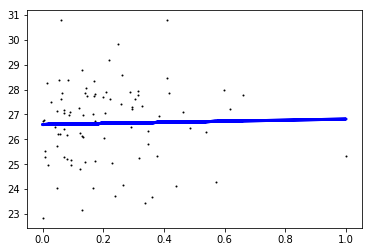

89


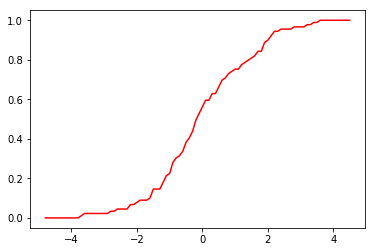

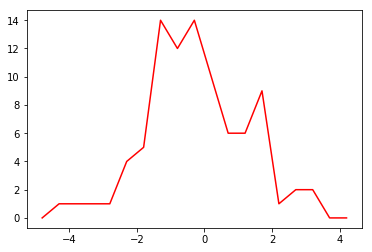

uninsured_value
SLR: -2.79, se: 1.48, T: 1.88, MLR: -11.15
Mean Error: 0.00, Error KS-test: KstestResult(statistic=0.9999272206090567, pvalue=0.0)


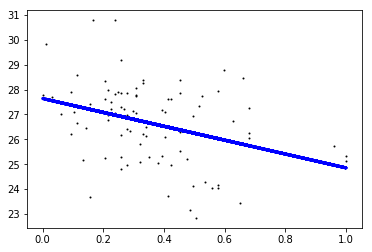

89


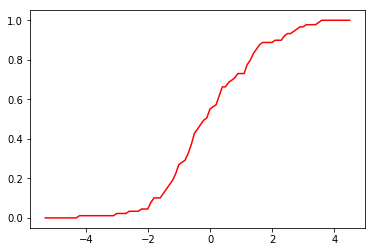

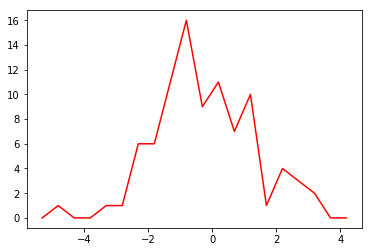

density
SLR: 4.33, se: 1.48, T: 2.92, MLR: 0.01
Mean Error: 0.00, Error KS-test: KstestResult(statistic=0.99999174404353042, pvalue=0.0)


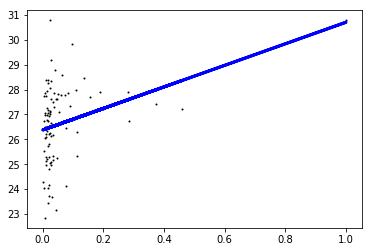

89


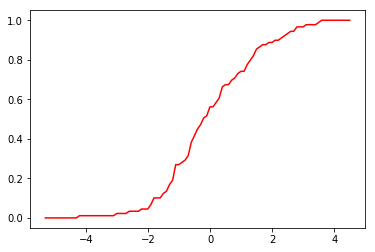

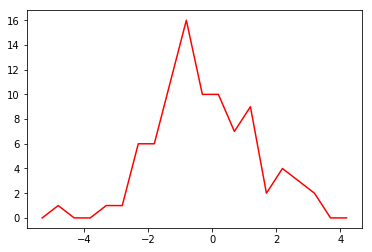

count
SLR: 4.18, se: 1.49, T: 2.81, MLR: -0.00
Mean Error: 0.00, Error KS-test: KstestResult(statistic=0.99999174970471372, pvalue=0.0)


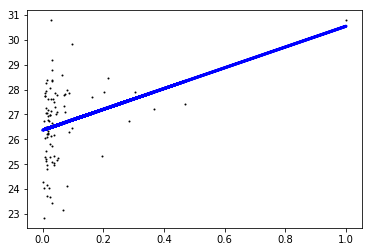

89


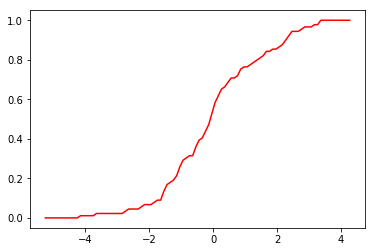

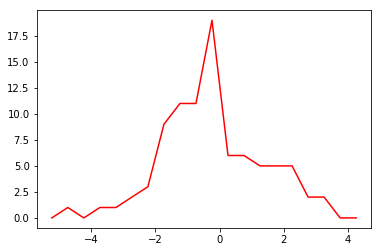

some_college_value
SLR: 2.31, se: 1.52, T: 1.52, MLR: 3.23
Mean Error: 0.00, Error KS-test: KstestResult(statistic=0.99998860158190495, pvalue=0.0)


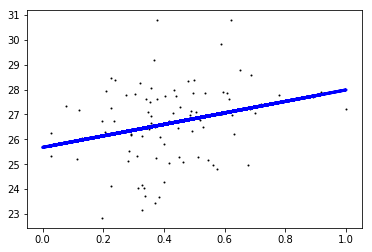

89


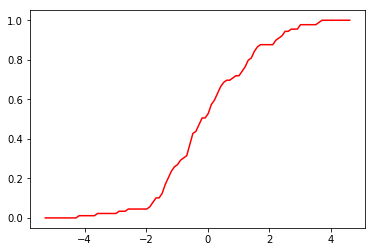

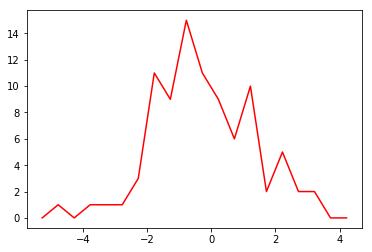

percent_graduate_or_professional_degree
SLR: 2.36, se: 1.54, T: 1.53, MLR: -0.10
Mean Error: 0.00, Error KS-test: KstestResult(statistic=0.99999071494505054, pvalue=0.0)


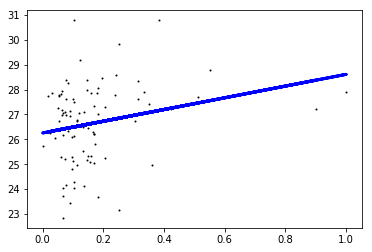

89


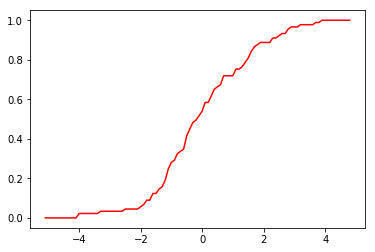

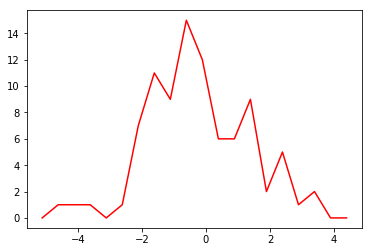

percent_some_college
SLR: -0.60, se: 1.58, T: 0.38, MLR: 0.04
Mean Error: 0.00, Error KS-test: KstestResult(statistic=0.99998019357386325, pvalue=0.0)


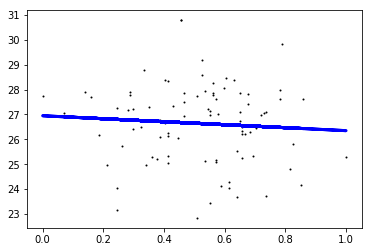

89


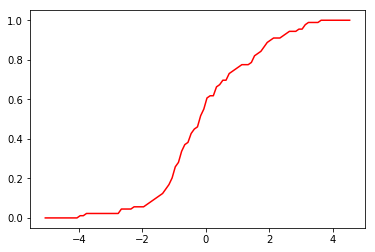

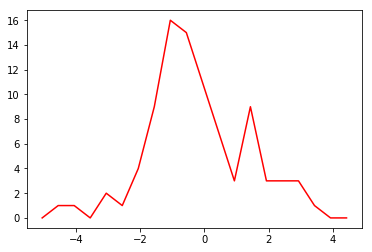

percent_less_than_9th_grade
SLR: -2.71, se: 1.51, T: 1.80, MLR: -0.02
Mean Error: 0.00, Error KS-test: KstestResult(statistic=0.99997593425722109, pvalue=0.0)


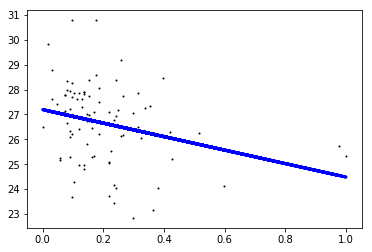

89


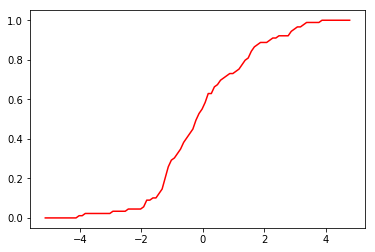

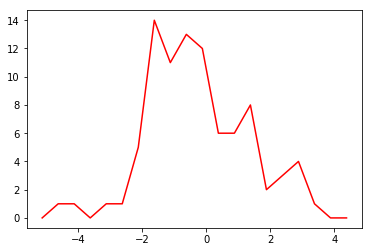

percent_associates_degree
SLR: -1.19, se: 1.56, T: 0.77, MLR: -0.19
Mean Error: 0.00, Error KS-test: KstestResult(statistic=0.99998102520064736, pvalue=0.0)


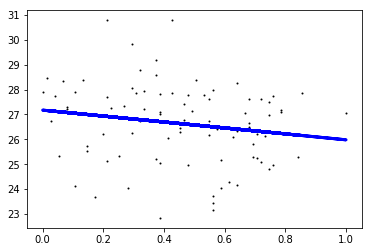

89


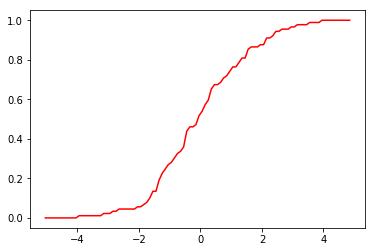

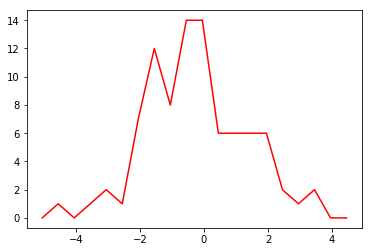

percent_bachelors_degree_or_higher
SLR: 2.59, se: 1.51, T: 1.72, MLR: 0.08
Mean Error: 0.00, Error KS-test: KstestResult(statistic=0.99997411215309229, pvalue=0.0)


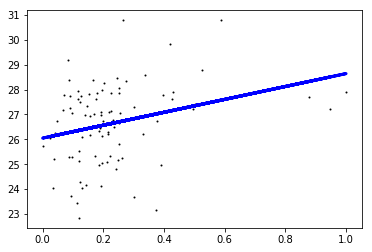

89


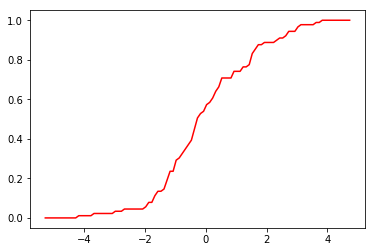

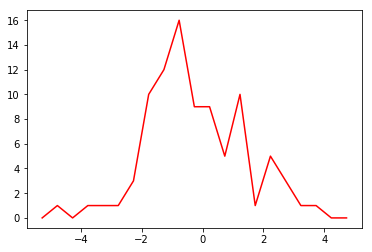

percent_high_school_graduate
SLR: -0.99, se: 1.57, T: 0.63, MLR: 0.12
Mean Error: 0.00, Error KS-test: KstestResult(statistic=0.99999016645823591, pvalue=0.0)


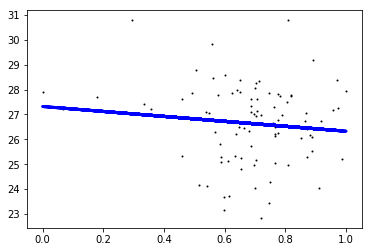

Predicting median_household_income_value
57


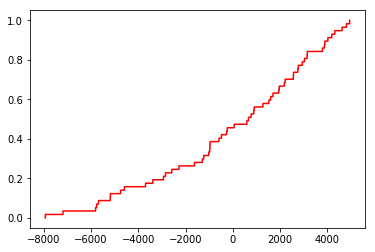

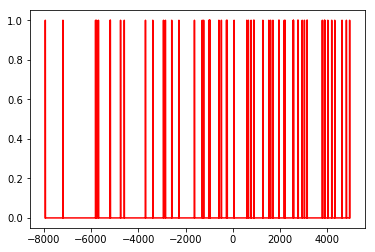

adult_obesity_value
SLR: -1010.84, se: 3338.54, T: 0.30, MLR: -0.00
Mean Error: -0.00, Error KS-test: KstestResult(statistic=1.0, pvalue=0.0)


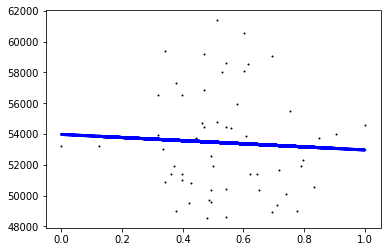

57


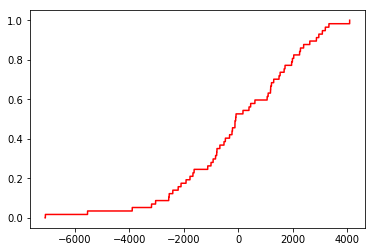

KeyboardInterrupt: 

In [31]:
# Values to predict on
regressors = [
  'adult_obesity_value',
  'children_in_poverty_value',
  'income_inequality_value',
  'median_household_income_value',
  'unemployment_value',
  'violent_crime_value',
  'uninsured_value',
  'density',
  'count',
  'some_college_value',
  'percent_graduate_or_professional_degree',
  'percent_some_college',
  'percent_less_than_9th_grade',
  'percent_associates_degree',
  'percent_bachelors_degree_or_higher',
  'percent_high_school_graduate',
]

# Values we want to predict
predictors = ['Hourly Wage Estimate','median_household_income_value']

# We only want to work on one year at a time to ignore the effects of inflation
targetYear = 2016

# Average per area used instead of raw data to prevent high-population spots from weighing too much
useAvg = True

for predictor in predictors:
    print("Predicting " + predictor)
    
    # Filter on attrs, restrict to year, and remove outliers
    usefulData = prepData(regressors + [predictor], predictor, targetYear, targetYear)
    
    # We want to have one entry for each area, where the hourly wage is the average for that area
    if useAvg:
        usefulData = usefulData.groupby(['Place of Residence']).mean()

    # Run MLR
    LR = linear_model.LinearRegression()
    train_x = usefulData[regressors]
    train_y = usefulData[[predictor]]
    LR.fit(train_x, train_y)
    pred = LR.predict(train_x)
    MLR_coef = LR.coef_[0]

    # Run SLR and compare each result to MLR counterpart, and print SLR line graph
    train_y = usefulData[[predictor]]
    for ri, r in enumerate(regressors):
        # Get datapoints for this variable and normalize them
        train_x = usefulData[[r]]
        train_x = (train_x - train_x.min()) / (train_x.max() - train_x.min())

        # Run SLR
        LR = linear_model.LinearRegression()
        LR.fit(train_x, train_y)
        pred = LR.predict(train_x)
        coef = LR.coef_[0][0]
        
        # Get error
        errors = np.array(sorted([(p-y) for y, p in zip(np.array(train_y), pred)]))
        
        # Get error CDF
        curVal = 0
        X_errs = np.arange(min(errors)-1, max(errors)+1, .1)
        CDF = []
        for i in X_errs:
            while curVal < len(errors) and errors[curVal] <= i:
                curVal += 1
            v = float(curVal) / len(errors)
            CDF.append(v)
        #plt.plot(X_errs, CDF, color="red")
        #plt.show()
        
        # Get error PDF
        curVal = 0
        X_errs = np.arange(min(errors)-1, max(errors)+1, .5)
        PDF = []
        for i in X_errs:
            PDF.append(sum(1 for e in errors if e > i and e <= i + .5))
        #plt.plot(X_errs, PDF, color="red")
        #plt.show()
        
        # Check error distribution
        ks = stats.kstest(errors, 'norm')
        se = math.sqrt(sum((p-y)**2 for y, p in zip(np.array(train_y), pred)) / len(pred))
        t_val = abs(coef / se)

        # Report results and plot graph
        print(r)
        print("SLR: {0:.2f}, se: {1:.2f}, T: {2:.2f}, MLR: {3:.2f}".format(coef, se, t_val, MLR_coef[ri]))
        print("Mean Error: {0:.2f}, Error KS-test: {1}".format(np.mean(errors), ks))
        plt.scatter(train_x, train_y, color='black', s=1)
        plt.plot(train_x, pred, color='blue', linewidth=3)
        plt.show()


## Wald's and K-S

In [44]:
def WaldsTest(df1, df2):
    w = (df1.mean() - df2.mean())/math.sqrt(df1.var()/len(df1) + df2.var()/len(df2))
    p_value = 2 * (1 - stats.norm.cdf(abs(w)))
    return w, p_value

def TTest(df):
    t = df.mean() / math.sqrt(df.var()/len(df))
    return t

Low vs High adult_obesity_value: w=17.276, k-s=Ks_2sampResult(statistic=0.15088609180286805, pvalue=1.2153258542344358e-61)
Avg Lower Quartile=28.928, Avg Higher Quartile=26.247


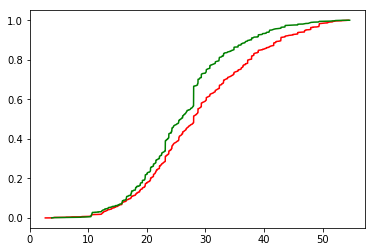

Low vs High children_in_poverty_value: w=0.659, k-s=Ks_2sampResult(statistic=0.093515586183059329, pvalue=4.9660806719280391e-16)
Avg Lower Quartile=27.265, Avg Higher Quartile=27.145


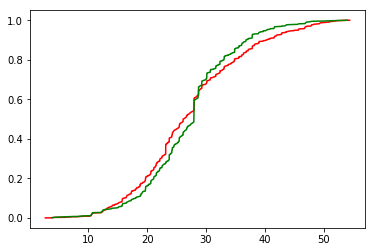

Low vs High income_inequality_value: w=-3.598, k-s=Ks_2sampResult(statistic=0.082291611126998843, pvalue=2.3920134615914019e-10)
Avg Lower Quartile=26.382, Avg Higher Quartile=27.163


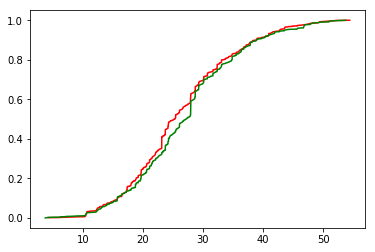

Low vs High median_household_income_value: w=-11.640, k-s=Ks_2sampResult(statistic=0.12473541673310551, pvalue=1.5019352132736938e-30)
Avg Lower Quartile=27.107, Avg Higher Quartile=29.131


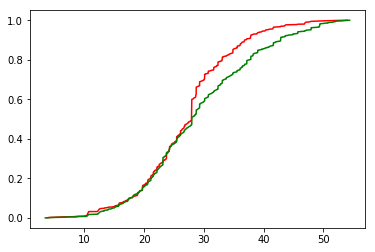

Low vs High unemployment_value: w=0.078, k-s=Ks_2sampResult(statistic=0.085568772762065315, pvalue=3.6766812922057441e-14)
Avg Lower Quartile=26.546, Avg Higher Quartile=26.531


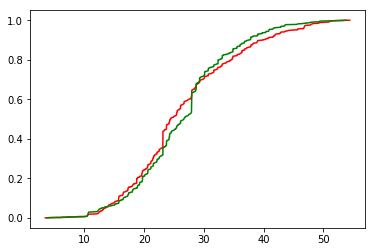

Low vs High violent_crime_value: w=-4.937, k-s=Ks_2sampResult(statistic=0.076134104846793282, pvalue=1.7241013694993957e-06)
Avg Lower Quartile=27.040, Avg Higher Quartile=28.269


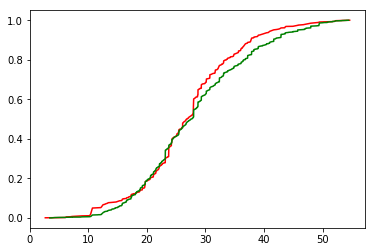

Low vs High uninsured_value: w=6.766, k-s=Ks_2sampResult(statistic=0.059426617041328567, pvalue=6.0745562047641425e-06)
Avg Lower Quartile=27.082, Avg Higher Quartile=25.702


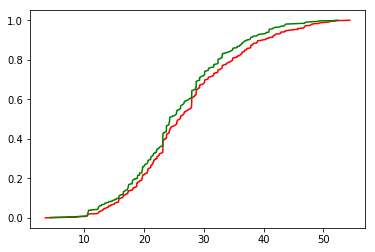

Low vs High density: w=-6.836, k-s=Ks_2sampResult(statistic=0.1140918743907533, pvalue=1.1038426186660159e-10)
Avg Lower Quartile=26.590, Avg Higher Quartile=28.444


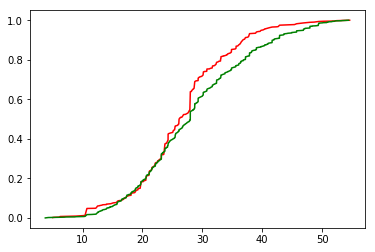

Low vs High count: w=-6.693, k-s=Ks_2sampResult(statistic=0.11598903372646385, pvalue=7.1709857329057584e-11)
Avg Lower Quartile=26.607, Avg Higher Quartile=28.434


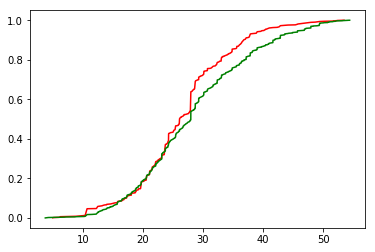

Low vs High some_college_value: w=-16.220, k-s=Ks_2sampResult(statistic=0.15039589081039861, pvalue=2.3002893118447978e-49)
Avg Lower Quartile=26.407, Avg Higher Quartile=29.216


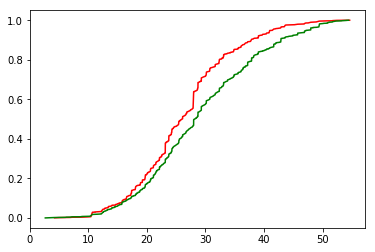

Low vs High percent_graduate_or_professional_degree: w=-8.914, k-s=Ks_2sampResult(statistic=0.12905467137589488, pvalue=5.1291196664676591e-24)
Avg Lower Quartile=26.971, Avg Higher Quartile=28.737


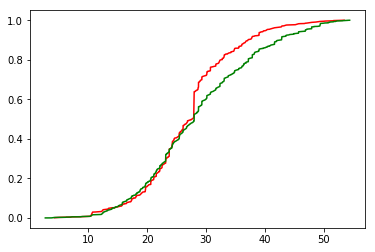

Low vs High percent_some_college: w=1.544, k-s=Ks_2sampResult(statistic=0.04416658256690309, pvalue=0.00040222767384475361)
Avg Lower Quartile=27.173, Avg Higher Quartile=26.877


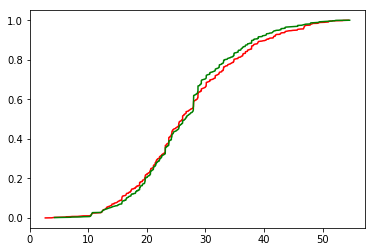

Low vs High percent_less_than_9th_grade: w=6.040, k-s=Ks_2sampResult(statistic=0.082388932571683948, pvalue=2.0098190036463409e-10)
Avg Lower Quartile=27.248, Avg Higher Quartile=25.980


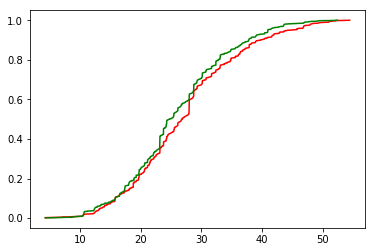

Low vs High percent_associates_degree: w=12.182, k-s=Ks_2sampResult(statistic=0.12681528995123981, pvalue=2.5686163233799937e-32)
Avg Lower Quartile=28.542, Avg Higher Quartile=26.413


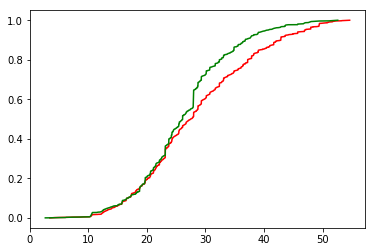

Low vs High percent_bachelors_degree_or_higher: w=-10.042, k-s=Ks_2sampResult(statistic=0.14248682482598862, pvalue=6.7734723934445429e-23)
Avg Lower Quartile=26.556, Avg Higher Quartile=28.728


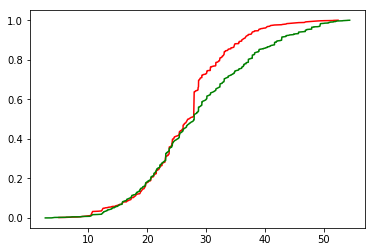

Low vs High percent_high_school_graduate: w=6.974, k-s=Ks_2sampResult(statistic=0.11401288068781223, pvalue=8.1775512333621391e-19)
Avg Lower Quartile=28.693, Avg Higher Quartile=27.303


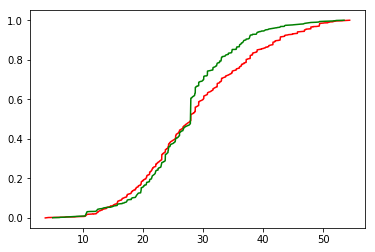

In [75]:
# Prepare data for experiment
predictor = 'Hourly Wage Estimate'
targetYear = 2016
usefulData = prepData([predictor], predictor, targetYear, targetYear)

attributes = [
  'adult_obesity_value',
  'children_in_poverty_value',
  'income_inequality_value',
  'median_household_income_value',
  'unemployment_value',
  'violent_crime_value',
  'uninsured_value',
  'density',
  'count',
  'some_college_value',
  'percent_graduate_or_professional_degree',
  'percent_some_college',
  'percent_less_than_9th_grade',
  'percent_associates_degree',
  'percent_bachelors_degree_or_higher',
  'percent_high_school_graduate', 
]

cutOnPop = False
quartiles = [.25,.75]

for a in attributes:
    usefulData = usefulData[usefulData[a].notnull()]
    if cutOnPop:
        firstQuartile = usefulData.quantile(quartiles[0])[a]
        thirdQuartile = usefulData.quantile(quartiles[1])[a]
        pop1 = usefulData[usefulData[a] < firstQuartile]
        pop2 = usefulData[usefulData[a] >= thirdQuartile]
    else:
        usefulResData = usefulData.drop_duplicates(subset='Place of Residence')
        firstQuartile = usefulResData.quantile(quartiles[0])[a]
        thirdQuartile = usefulResData.quantile(quartiles[1])[a]
        res1 = usefulResData[usefulResData[a] < firstQuartile]['Place of Residence']
        res2 = usefulResData[usefulResData[a] >= thirdQuartile]['Place of Residence']
        pop1 = usefulData[usefulData['Place of Residence'].isin(res1)]
        pop2 = usefulData[usefulData['Place of Residence'].isin(res2)]
    
    w, p_value = WaldsTest(pop1[predictor], pop2[predictor])
    k_stat = stats.ks_2samp(pop1[predictor], pop2[predictor])
    print("Low vs High {0}: w={1:.3f}, k-s={2}".format(a, w, k_stat))
    print("Avg Lower Quartile={0:.3f}, Avg Higher Quartile={1:.3f}".format(pop1[predictor].mean(), pop2[predictor].mean()))
    
    plt.plot(pop1[predictor].value_counts().sort_index().apply((lambda x: x/float(len(pop1)))).cumsum(), color="red")
    plt.plot(pop2[predictor].value_counts().sort_index().apply((lambda x: x/float(len(pop2)))).cumsum(), color="green")
    
    plt.show()

## Weird Wald's/K-S Thing we probably won't use

In [185]:
# Prepare data for experiment
predictor = 'Hourly Wage Estimate'
targetYear = 2016
usefulData = prepData([predictor], predictor, targetYear, targetYear)
allResidences = list(fullData["Place of Residence"].unique())

# Will map pair of residences to w and k-s statistics
cityPairCompResults = dict()

# Compare all pairs of residences
for r1i in range(0, len(allResidences)):
    for r2i in range(r1i + 1, len(allResidences)):
        # Get residence names
        r1n = allResidences[r1i]
        r2n = allResidences[r2i]
        
        # Get salary data for all people from each residence
        r1 = usefulData[usefulData['Place of Residence'] == r1n][predictor]
        r2 = usefulData[usefulData['Place of Residence'] == r2n][predictor]
        
        # Run Wald's test and K-S test on populations
        if len(r1) == 0 or len(r2) == 0:
            continue
        w, p_value = WaldsTest(r1, r2)
        k_stat = stats.ks_2samp(r1, r2).statistic
        cityPairCompResults[(r1n, r2n)] = (w, k_stat)

Differences in adult_obesity_value
-0.0065240784784


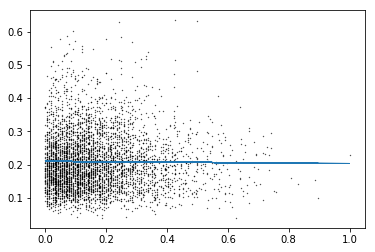

Differences in children_in_poverty_value
-0.00410278830149


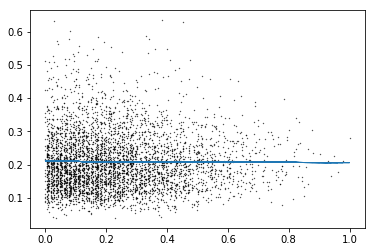

Differences in income_inequality_value
-0.0027275593629


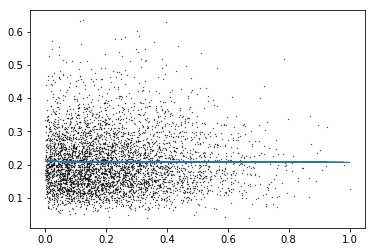

Differences in median_household_income_value
-0.0088083509112


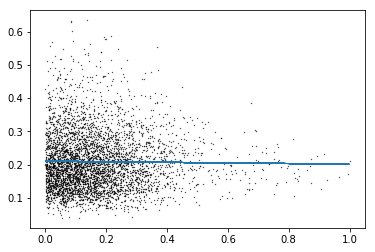

Differences in unemployment_value
-0.00397619963557


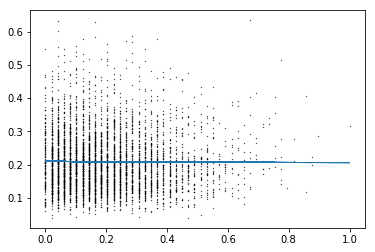

Differences in violent_crime_value
0.0164534789811


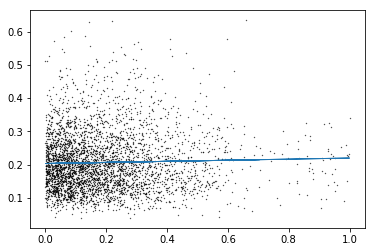

Differences in uninsured_value
-0.00406585216047


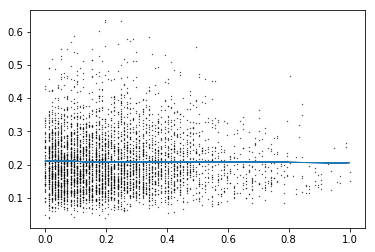

Differences in density
0.0730751268282


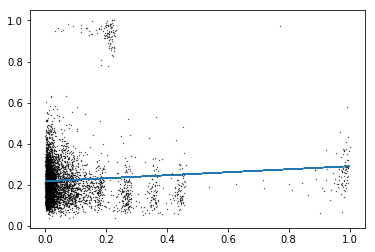

Differences in count
0.749505771753


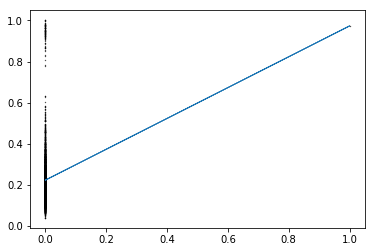

In [186]:
# Plot differences in W and K-S to differences in attributes
yearlyData = residenceData[residenceData['Fiscal Year'].dt.year == targetYear]
attributes = [
  'adult_obesity_value',
  'children_in_poverty_value',
  'income_inequality_value',
  'median_household_income_value',
  'unemployment_value',
  'violent_crime_value',
  'uninsured_value',
  'density',
  'count',
  #'some_college_value',
  #'percent_graduate_or_professional_degree',
  #'percent_some_college',
  #'percent_less_than_9th_grade',
  #'percent_associates_degree',
  #'percent_bachelors_degree_or_higher',
  #'percent_high_school_graduate', 
]
LR = linear_model.LinearRegression()
for a in attributes:
    print("Differences in " + a)
    
    # Get difference between attribute values for residences and their salary statistics
    x = []
    y = []
    for (r1, r2), (w, k) in cityPairCompResults.items():
        # Get attribute for areas and their difference
        r1a = yearlyData[yearlyData['Place of Residence'] == r1][a].iloc[0]
        r2a = yearlyData[yearlyData['Place of Residence'] == r2][a].iloc[0]
        if np.isnan(r1a) or np.isnan(r2a):
            continue
        dif = abs(r1a - r2a)
        
        # Add difference for x value and statistic for y value
        x.append(dif)
        y.append(abs(k))
    
    # Normalize x values
    x = np.array(x).reshape(-1, 1)
    x = (x - x.min()) / (x.max() - x.min())
    
    # Run Simple LR
    LR.fit(x, y)
    pred = LR.predict(x)
    
    # Plot results
    print(LR.coef_[0])
    plt.scatter(x, y, color='black', s=.1)
    plt.plot(x, pred, linewidth=1)
    plt.show()

## Long-term residents vs Newcomers

H: The 5-year future salary of someone who just moved to a city is the same as that of someone who has lived there for n+ years

In [46]:
predictor = 'Hourly Wage Estimate'
usefulData = prepData([predictor], predictor, 2006, 2018)
startYear = 2007
#residences = ['POLK', 'JOHNSON', 'STORY', 'BLACK HAWK', 'LINN', 'BOONE', 'WASHINGTON']
residences = usefulData['Place of Residence'].value_counts()[:10]
#print residences
residences = residences.index.tolist()

showGraphs = False

# n is min number of years to be a 'long-term' resident
for n in range(2,5):
    # targetYear is how many years after moving we want to compare salaries
    for targetYear in range(0, 6):
        salary_difs = []
        for residence in residences:
            # Get people who lived here in start year
            inrespop = usefulData[(usefulData['Place of Residence'] == residence) & (usefulData['Fiscal Year'].dt.year == startYear)]

            # Do calculations moving forward one year at a time
            for y in range(startYear+1, 2018):
                # Get people who live in the residence now
                inresnow = usefulData[(usefulData['Place of Residence'] == residence) & (usefulData['Fiscal Year'].dt.year == y)]

                # People who live here now and have lived here in the past
                inrespop = pd.merge(inrespop, inresnow, on='Name', suffixes=('_x',''))
                inrespop = inrespop[inrespop['Fiscal Year'].dt.year == y]
                inrespop_mean = inrespop[predictor].mean()

                # Get people who did not live here last year but live here now
                notinresbefore = usefulData[(usefulData['Place of Residence'] != residence) & (usefulData['Fiscal Year'].dt.year == y-1)]
                newcomers = pd.merge(notinresbefore, inresnow, on='Name', suffixes=('_x',''))
                newcomers = newcomers[newcomers['Fiscal Year'].dt.year == y]
                newcomers_mean = newcomers[predictor].mean()

                # Now show how these populations perform going forward
                inpop_sub = []
                newcome_sub = []
                pop1 = inrespop
                pop2 = newcomers
                for m in range(y, 2018):
                    inresnow = inresnow = usefulData[(usefulData['Place of Residence'] == residence) & (usefulData['Fiscal Year'].dt.year == m)]
                    pop1 = pd.merge(pop1, inresnow, on='Name', suffixes=('_x',''))
                    pop1 = pop1[pop1['Fiscal Year'].dt.year == m]
                    pop1_mean = pop1[predictor].mean()
                    pop2 = pd.merge(pop2, inresnow, on='Name', suffixes=('_x',''))
                    pop2 = pop2[pop2['Fiscal Year'].dt.year == m]
                    pop2_mean = pop2[predictor].mean()
                    inpop_sub.append(pop1_mean)
                    newcome_sub.append(pop2_mean)

                    if m - y == targetYear and y - startYear >= n and not np.isnan(pop1_mean) and not np.isnan(pop2_mean):
                        salary_difs.append(pop1_mean - pop2_mean)

                if showGraphs:
                    print("{0}: {1}-year residents vs newcomers from {2} onward".format(residence, y-startYear, y))
                    plt.plot(range(y,2018), inpop_sub, color='blue')
                    plt.plot(range(y,2018), newcome_sub, color='green')
                    plt.show()

        salary_difs = np.array(salary_difs)
        t = TTest(salary_difs)
        print("\nLong-Term residence req: {0}, Future comparison year: {1}".format(n, targetYear))
        print("Avg difference in mean salary: {0}".format(salary_difs.mean()))
        print("T-stat: {0}, n: {1}".format(t, len(salary_difs)))


Long-Term residence req: 2, Future comparison year: 0
Avg difference in mean salary: 3.00673385094
T-stat: 10.6696419637, n: 90

Long-Term residence req: 2, Future comparison year: 1
Avg difference in mean salary: 1.96775772594
T-stat: 6.22256503282, n: 80

Long-Term residence req: 2, Future comparison year: 2
Avg difference in mean salary: 1.29254205766
T-stat: 3.71358151509, n: 70

Long-Term residence req: 2, Future comparison year: 3
Avg difference in mean salary: 0.453394268658
T-stat: 1.40042546602, n: 60

Long-Term residence req: 2, Future comparison year: 4
Avg difference in mean salary: -0.488653865408
T-stat: -1.18046884537, n: 50

Long-Term residence req: 2, Future comparison year: 5
Avg difference in mean salary: -1.19762450481
T-stat: -2.95925743393, n: 40

Long-Term residence req: 3, Future comparison year: 0
Avg difference in mean salary: 3.0519012712
T-stat: 9.87566640749, n: 80

Long-Term residence req: 3, Future comparison year: 1
Avg difference in mean salary: 2.0192

In [ ]:
# TODO: for each residence...
#           for y in range(2007,2017)...
#               for m in range(0,max)...
#                   get average salary for people who have lived in city since y for m years
#                   calculate TSA predictors for y to 2017
#                   make future predictions
#           compare AR B vectors for different m's and y's